In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = np.array([1,0,0,0]) 
x = np.array([4,3,6])
y = np.array([2,-2,3])
z = np.array([1,0,-3])
r = np.array([4,2,3])
train_list = [{0:x}, {1:y}, {1:z}, {0:r}]


In [3]:
w_2 = np.array([1,0,0]) 
a = np.array([0,0])
b = np.array([0,1])
c = np.array([1,0])
d = np.array([1,1])
train_list_xor = [{0:a}, {1:b}, {1:c}, {0:d}]
train_list_or = [{0:a}, {1:b}, {1:c}, {1:d}]
train_list_and = [{0:a}, {0:b}, {0:c}, {1:d}]

In [4]:
def classify(w,x,show_process=False):
    if show_process: print(f"\t dot of {w}, {x} : {np.dot(w, x)}")
    if np.dot(w, x) >= 0:
        return 1
    else:
        return 0

In [5]:
def update_weights(w, x, change, b = 1):
    return w + b*change*x

In [71]:
def plot_perceptron(w, points=[(0,0),(0,1),(1,0),(1,1)], next_step=100):
    if len(w) == 3: # 2d plot for x-y
        w0, w1, w2 = w
        xmin, ymin, xmax, ymax = (0, 0, 0, 0) # default
        for x, y in points:
            if x < xmin: xmin = x
            elif x > xmax: xmax = x
            else: pass
            if y < ymin: ymin = y
            elif y > ymax: ymax = y
            else: pass
            
        print(f"({w0}) + ({w1})x + ({w2})y = 0")
        if w2==0:
            if w1 == 0:
                print(f"This equation:\t {w0} = 0 \t is not a line \n")
            else:
                x = -(w0/w1)
                xmin = min(xmin,x)
                xmax = max(xmax,x)
                plt.axvline(x=x, color='blue')
        else:
            x = np.linspace(xmin-0.5, xmax+0.5, (xmax-xmin)*100)
            y = (-w1/w2)*x + (-w0/w2)
            plt.plot(x,y, color='blue')
        for i, point in enumerate(points):
            if(next_step < i+1): break
            xp, yp = point
            if next_step % len(points)  == (i + 1) % len(points): 
                color = 'purple'
                size = 150
            else: 
                color = 'purple'
                size = 50
            plt.scatter(xp, yp, color=f'{color}', s=size)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Plot of ({w0}) + ({w1})x + ({w2})y = 0')
        
        # Random points to show which are classified to each category
        x_rand = np.random.rand(100)*(xmax-xmin+1) + (xmin-0.5)
        y_rand = np.random.rand(100)*(ymax-ymin+1) + (ymin-0.5)

        # Mask for the classification to category 1 
        mask = (w0) + (w1)*x_rand + (w2)*y_rand >= 0

        # green for class 1 , red for class 0
        plt.scatter(x_rand[mask], y_rand[mask], color='green', label='Inside Half-plane', s=5)
        plt.scatter(x_rand[~mask], y_rand[~mask], color='red', label='Outside Half-plane', s=5)
        plt.grid(True)
        plt.xlim(xmin-0.5, xmax+0.5)
        plt.ylim(ymin-0.5, ymax+0.5)
        plt.show()
            
    else:
        print("I can only plot for 2 dimensions x-y")

In [43]:
def train_perceptron(w_start, train_list, b = 1, plot=True, show_process=True):
    w = w_start
    points = []
    for dic in train_list:
        for i, point in dic.items():
            points.append(point)
            break
    i = 0 
    plot_perceptron(w, points=points, next_step=i+1)
    counter = 0 # number of consecutive correct classifications
    while(counter < len(train_list) and i < 100): # until there are not wrong classifications or i = 100  
        if show_process: print(f"{i+1} Step:")
        u = train_list[i%len(train_list)] # in order to circularly use the next vector
        for y, x in u.items(): # y is the class, x is the vector
            break
        if show_process: print(f"\t Class: y = {y}, Vector: x = {x}")
        x = np.insert(x, 0, 1) # extend the vector
        
        # Classification
        f = classify(w,x,show_process)
        if(f==y):
            if show_process: print('\t Correctly classified')
            counter += 1 # one more correct classification
        else:
            if show_process: print(f'\t Classified in class {f} whereas it is in class {y}')
            counter = 0 # we need to update the weights
        
        # Update 
        w = update_weights(w, x, y - f, b)
        if show_process: print(f"\t w = {w}\n")
        i += 1 # next 
        plot_perceptron(w, points=points, next_step=i+1)
    # plot and return value of weight vector w
    plot_perceptron(w, points=points)
    return w
        


In [35]:
train_perceptron(w,train_list)


[4 3 6]
[ 2 -2  3]
[ 1  0 -3]
[4 2 3]
1 Step:
	 Class: y = 0, Vector: x = [4 3 6]
	 dot of [1 0 0 0], [1 4 3 6] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [ 0 -4 -3 -6]

I can only plot for 2 dimensions x-y
2 Step:
	 Class: y = 1, Vector: x = [ 2 -2  3]
	 dot of [ 0 -4 -3 -6], [ 1  2 -2  3] : -20
	 Classified in class 0 whereas it is in class 1
	 w = [ 1 -2 -5 -3]

I can only plot for 2 dimensions x-y
3 Step:
	 Class: y = 1, Vector: x = [ 1  0 -3]
	 dot of [ 1 -2 -5 -3], [ 1  1  0 -3] : 8
	 Correctly classified
	 w = [ 1 -2 -5 -3]

I can only plot for 2 dimensions x-y
4 Step:
	 Class: y = 0, Vector: x = [4 2 3]
	 dot of [ 1 -2 -5 -3], [1 4 2 3] : -26
	 Correctly classified
	 w = [ 1 -2 -5 -3]

I can only plot for 2 dimensions x-y
5 Step:
	 Class: y = 0, Vector: x = [4 3 6]
	 dot of [ 1 -2 -5 -3], [1 4 3 6] : -40
	 Correctly classified
	 w = [ 1 -2 -5 -3]

I can only plot for 2 dimensions x-y
6 Step:
	 Class: y = 1, Vector: x = [ 2 -2  3]
	 dot of [ 1 -2 -5 -3], [ 1  2 -

array([ 2,  0, -7,  0])

(1) + (0)x + (0)y = 0
This equation:	 1 = 0 	 is not a line 



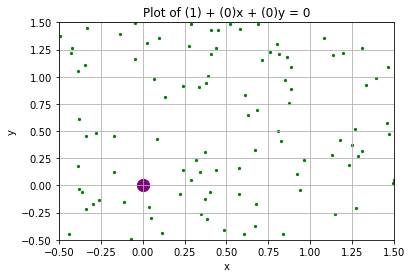

1 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [1 0 0], [1 0 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-4  0  0]

(-4) + (0)x + (0)y = 0
This equation:	 -4 = 0 	 is not a line 



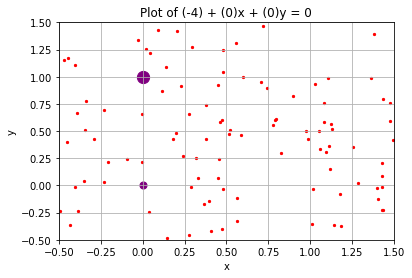

2 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-4  0  0], [1 0 1] : -4
	 Correctly classified
	 w = [-4  0  0]

(-4) + (0)x + (0)y = 0
This equation:	 -4 = 0 	 is not a line 



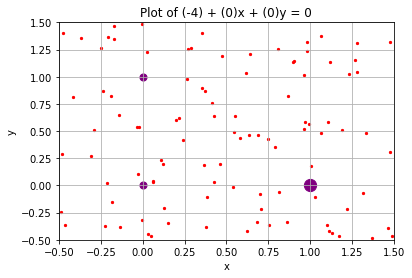

3 Step:
	 Class: y = 0, Vector: x = [1 0]
	 dot of [-4  0  0], [1 1 0] : -4
	 Correctly classified
	 w = [-4  0  0]

(-4) + (0)x + (0)y = 0
This equation:	 -4 = 0 	 is not a line 



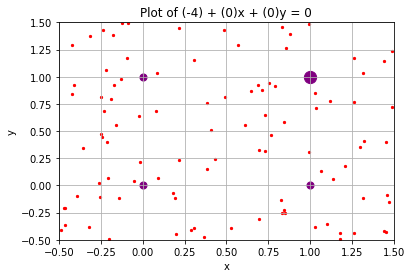

4 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [-4  0  0], [1 1 1] : -4
	 Classified in class 0 whereas it is in class 1
	 w = [1 5 5]

(1) + (5)x + (5)y = 0


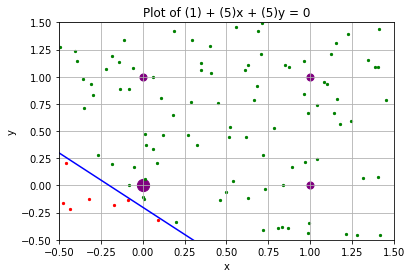

5 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [1 5 5], [1 0 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-4  5  5]

(-4) + (5)x + (5)y = 0


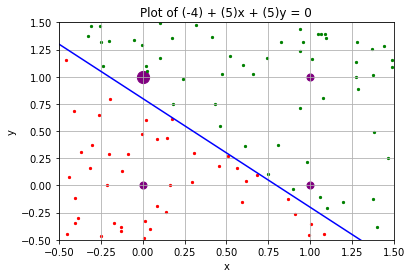

6 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-4  5  5], [1 0 1] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-9  5  0]

(-9) + (5)x + (0)y = 0


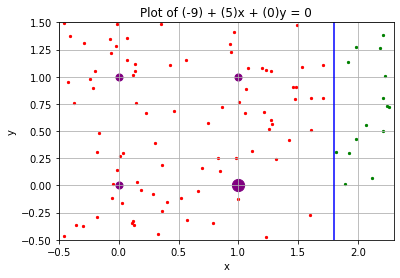

7 Step:
	 Class: y = 0, Vector: x = [1 0]
	 dot of [-9  5  0], [1 1 0] : -4
	 Correctly classified
	 w = [-9  5  0]

(-9) + (5)x + (0)y = 0


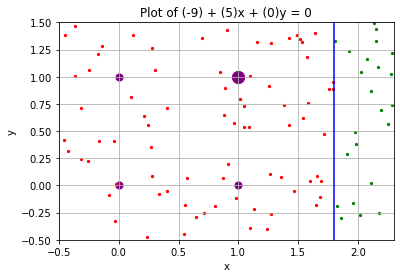

8 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [-9  5  0], [1 1 1] : -4
	 Classified in class 0 whereas it is in class 1
	 w = [-4 10  5]

(-4) + (10)x + (5)y = 0


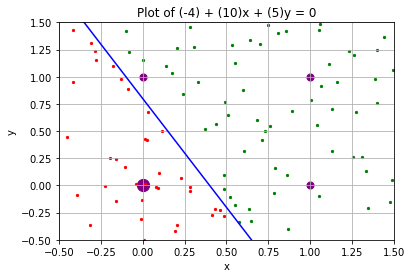

9 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [-4 10  5], [1 0 0] : -4
	 Correctly classified
	 w = [-4 10  5]

(-4) + (10)x + (5)y = 0


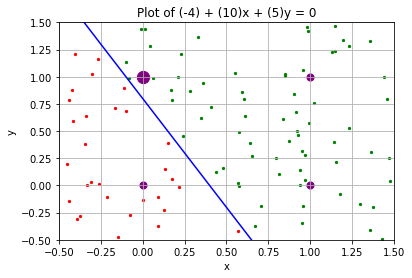

10 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-4 10  5], [1 0 1] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-9 10  0]

(-9) + (10)x + (0)y = 0


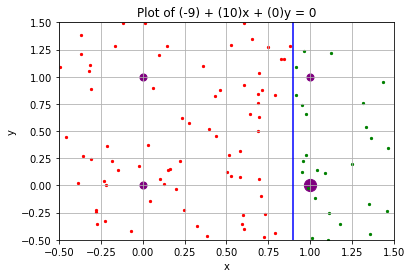

11 Step:
	 Class: y = 0, Vector: x = [1 0]
	 dot of [-9 10  0], [1 1 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-14   5   0]

(-14) + (5)x + (0)y = 0


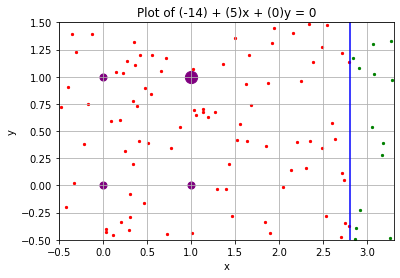

12 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [-14   5   0], [1 1 1] : -9
	 Classified in class 0 whereas it is in class 1
	 w = [-9 10  5]

(-9) + (10)x + (5)y = 0


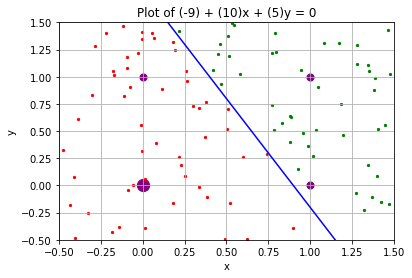

13 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [-9 10  5], [1 0 0] : -9
	 Correctly classified
	 w = [-9 10  5]

(-9) + (10)x + (5)y = 0


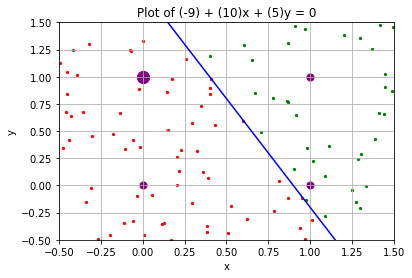

14 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-9 10  5], [1 0 1] : -4
	 Correctly classified
	 w = [-9 10  5]

(-9) + (10)x + (5)y = 0


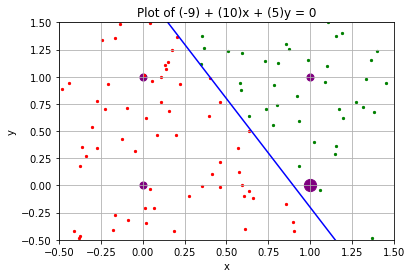

15 Step:
	 Class: y = 0, Vector: x = [1 0]
	 dot of [-9 10  5], [1 1 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-14   5   5]

(-14) + (5)x + (5)y = 0


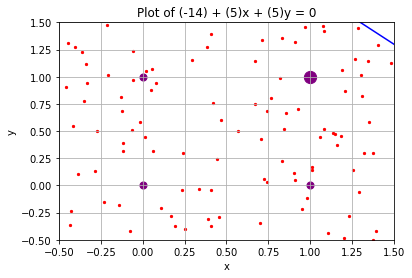

16 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [-14   5   5], [1 1 1] : -4
	 Classified in class 0 whereas it is in class 1
	 w = [-9 10 10]

(-9) + (10)x + (10)y = 0


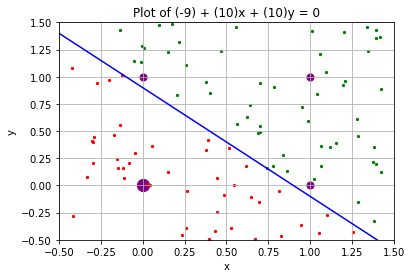

17 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [-9 10 10], [1 0 0] : -9
	 Correctly classified
	 w = [-9 10 10]

(-9) + (10)x + (10)y = 0


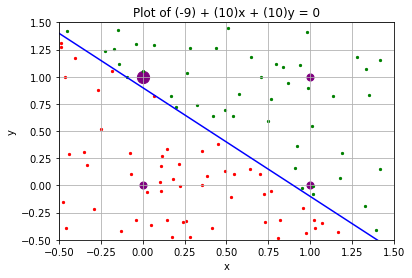

18 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-9 10 10], [1 0 1] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-14  10   5]

(-14) + (10)x + (5)y = 0


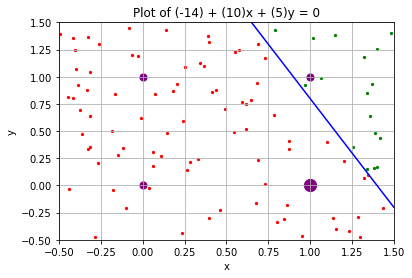

19 Step:
	 Class: y = 0, Vector: x = [1 0]
	 dot of [-14  10   5], [1 1 0] : -4
	 Correctly classified
	 w = [-14  10   5]

(-14) + (10)x + (5)y = 0


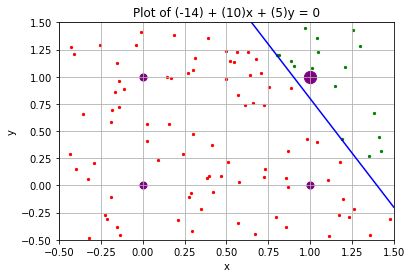

20 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [-14  10   5], [1 1 1] : 1
	 Correctly classified
	 w = [-14  10   5]

(-14) + (10)x + (5)y = 0


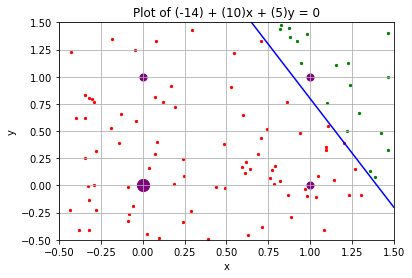

21 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [-14  10   5], [1 0 0] : -14
	 Correctly classified
	 w = [-14  10   5]

(-14) + (10)x + (5)y = 0


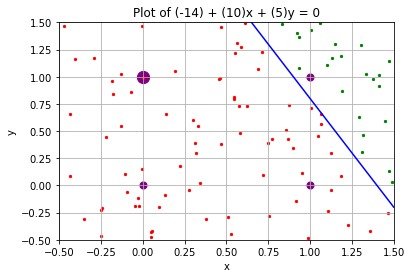

22 Step:
	 Class: y = 0, Vector: x = [0 1]
	 dot of [-14  10   5], [1 0 1] : -9
	 Correctly classified
	 w = [-14  10   5]

(-14) + (10)x + (5)y = 0


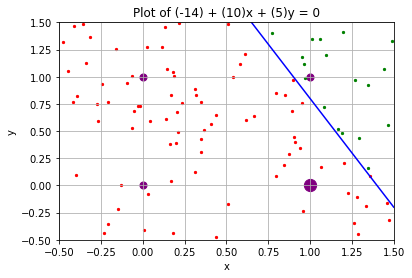

(-14) + (10)x + (5)y = 0


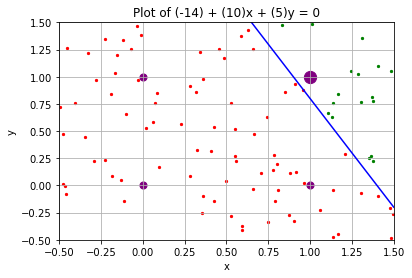

array([-14,  10,   5])

In [72]:
#train_perceptron(w_2,train_list_xor) # XOR is NOT linearly seperable problem
#train_perceptron(w_2,train_list_or,2, show_process=True) # OR problem
train_perceptron(w_2,train_list_and,5) # AND problem

In [10]:
classify(np.array([-1,  2,  2]), (1,1,1), True)

	 dot of [-1  2  2], (1, 1, 1) : 3


1

[0.26074101 0.57825692 0.38888015 0.4519656  0.61286049 0.08156022
 0.66086465 0.53773129 0.923725   0.1821117  0.84647891 0.33661849
 0.7120667  0.89195499 0.16931513 0.72939025 0.82264135 0.93137787
 0.55281366 0.49582453 0.30282065 0.53762264 0.41476691 0.15765286
 0.60557785 0.90010346 0.98503525 0.17430628 0.19816428 0.95473871
 0.33167293 0.40850247 0.290364   0.61520391 0.62597426 0.47293044
 0.61640371 0.86740903 0.96834167 0.36358898 0.9380125  0.74320539
 0.45939831 0.66111372 0.62213544 0.66207009 0.79542287 0.07405137
 0.49610802 0.19031871 0.25944841 0.52356846 0.65367163 0.30913628
 0.27234676 0.32282325 0.39710083 0.62082223 0.53100681 0.08469622
 0.77575913 0.13256565 0.78489297 0.60273778 0.7838242  0.15234817
 0.78454904 0.0035407  0.92563644 0.74742712 0.10465186 0.71675306
 0.10757461 0.47359593 0.53081883 0.72683721 0.11259273 0.25016874
 0.00291542 0.6835994  0.34859182 0.19111426 0.16048332 0.5993579
 0.56087946 0.45806749 0.73146424 0.74676088 0.58378688 0.84526

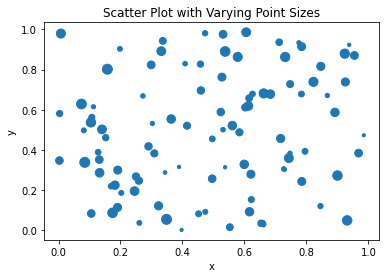

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.random.rand(100)
print(x)
sizes = np.random.randint(10, 100, size=100)  # Random sizes for the points

plt.scatter(x, y, s=sizes)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Varying Point Sizes')

plt.show()

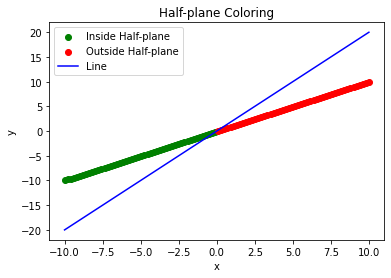

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Ορισμός της ευθείας που ορίζει το ημιεπίπεδο
def line(x):
    return 2 * x

# Δημιουργία των σημείων
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Δημιουργία της μάσκας
mask = y >= line(x)

# Χρωματισμός των σημείων
plt.scatter(x[mask], y[mask], color='green', label='Inside Half-plane')
plt.scatter(x[~mask], y[~mask], color='red', label='Outside Half-plane')

# Προσθήκη της ευθείας
plt.plot(x, line(x), color='blue', label='Line')

# Προσθήκη ετικετών και τίτλου
plt.xlabel('x')
plt.ylabel('y')
plt.title('Half-plane Coloring')

# Προσθήκη του λεζάντα
plt.legend()

# Εμφάνιση του γραφήματος
plt.show()